In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow.keras as keras
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tqdm import tqdm
from keras.layers import Dropout

In [ ]:
from google.colab import files
matches_uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
matches_uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.shape

(2000, 21)

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# **To check the duplicated values**

In [ ]:
duplicates=train.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [ ]:
duplicates.sum()

0

**Hence there are no duplicate values**

# Cheking for Missing values

In [ ]:
train.isnull()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Hence there are no missing values**

EDA on basis of numerical and categorial data

In [ ]:
cat_data=train[['blue', 'dual_sim', 'four_g','three_g',
       'touch_screen', 'wifi', 'price_range']]
cat_data

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,0
1996,1,1,0,1,1,1,2
1997,0,1,1,1,1,0,3
1998,0,0,1,1,1,1,0


In [ ]:
num_data=train.drop(['blue', 'dual_sim', 'four_g',
                     'three_g','touch_screen', 'wifi', 'price_range'],axis=1)
num_data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


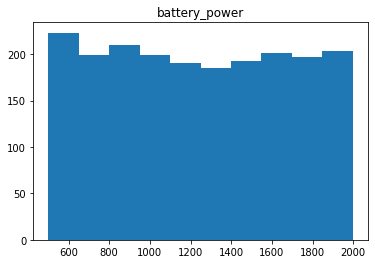

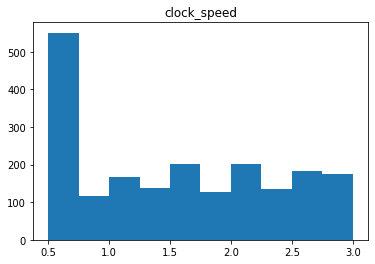

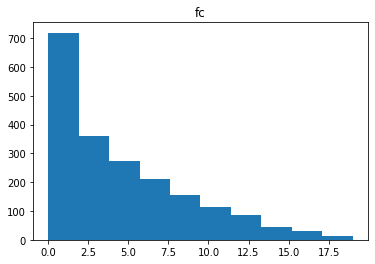

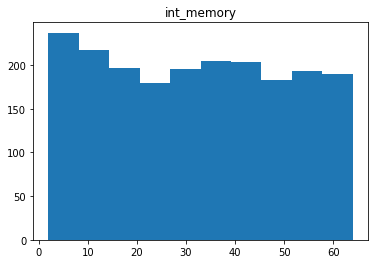

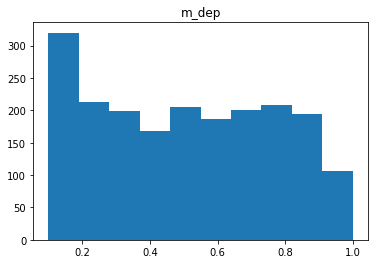

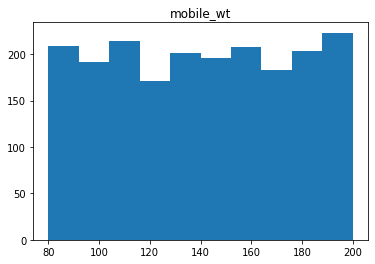

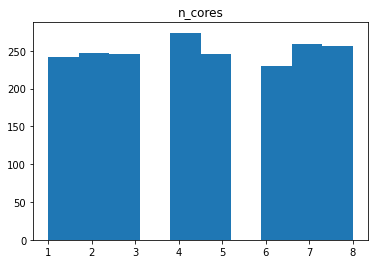

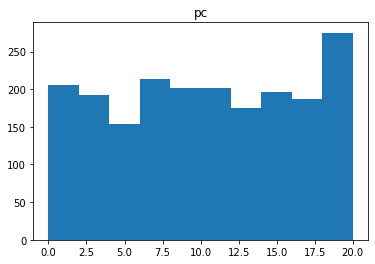

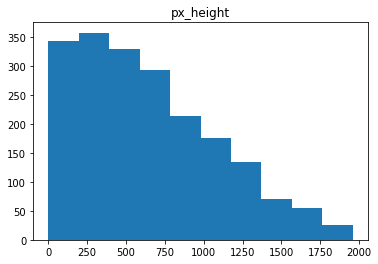

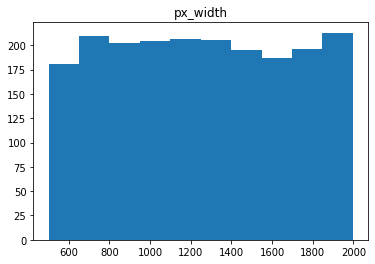

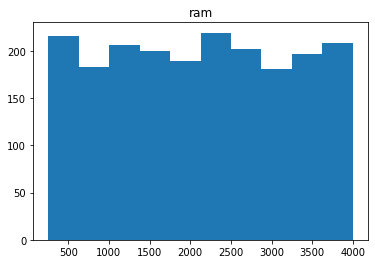

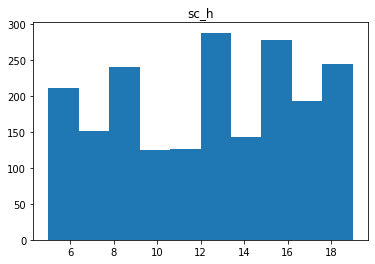

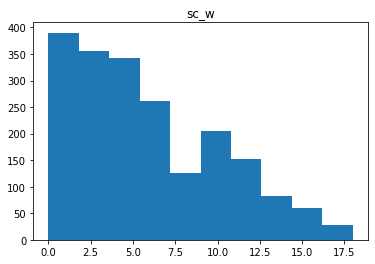

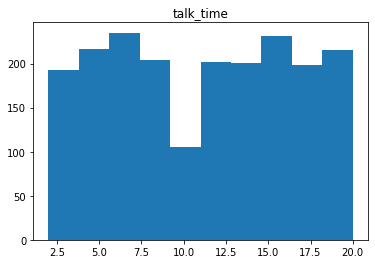

In [ ]:
for column in num_data.columns:
    plt.hist(num_data[column])
    plt.title(column)
    plt.show()

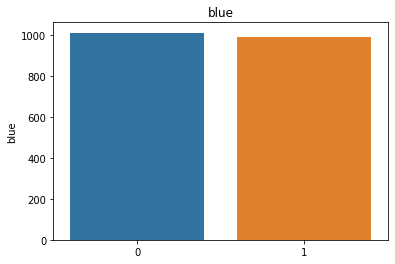

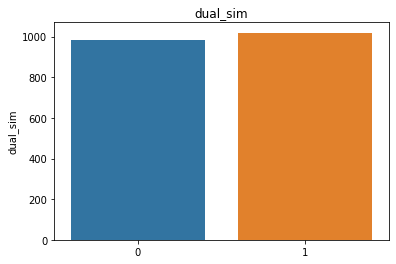

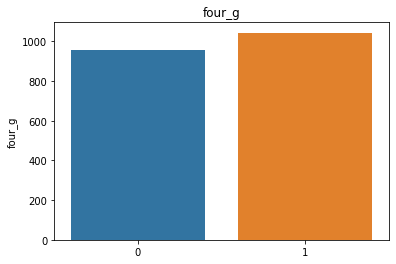

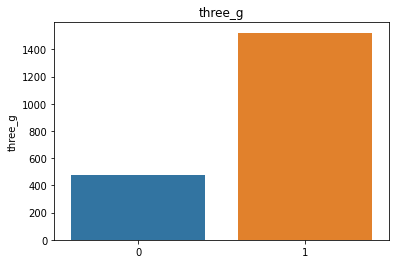

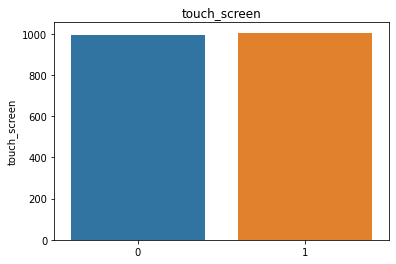

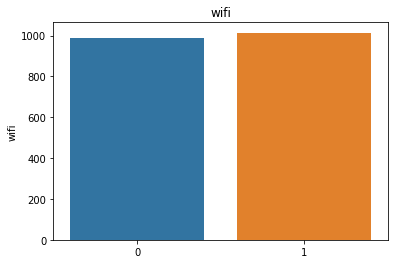

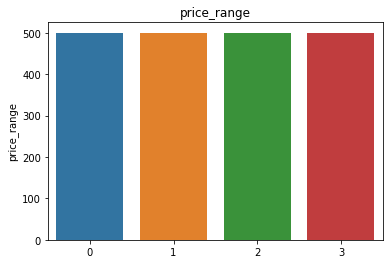

In [ ]:
for cat_column in cat_data.columns:
    sns.barplot(cat_data[cat_column].value_counts().index,cat_data[cat_column].value_counts())
    plt.title(cat_column)
    plt.show()

Checking for the outliers

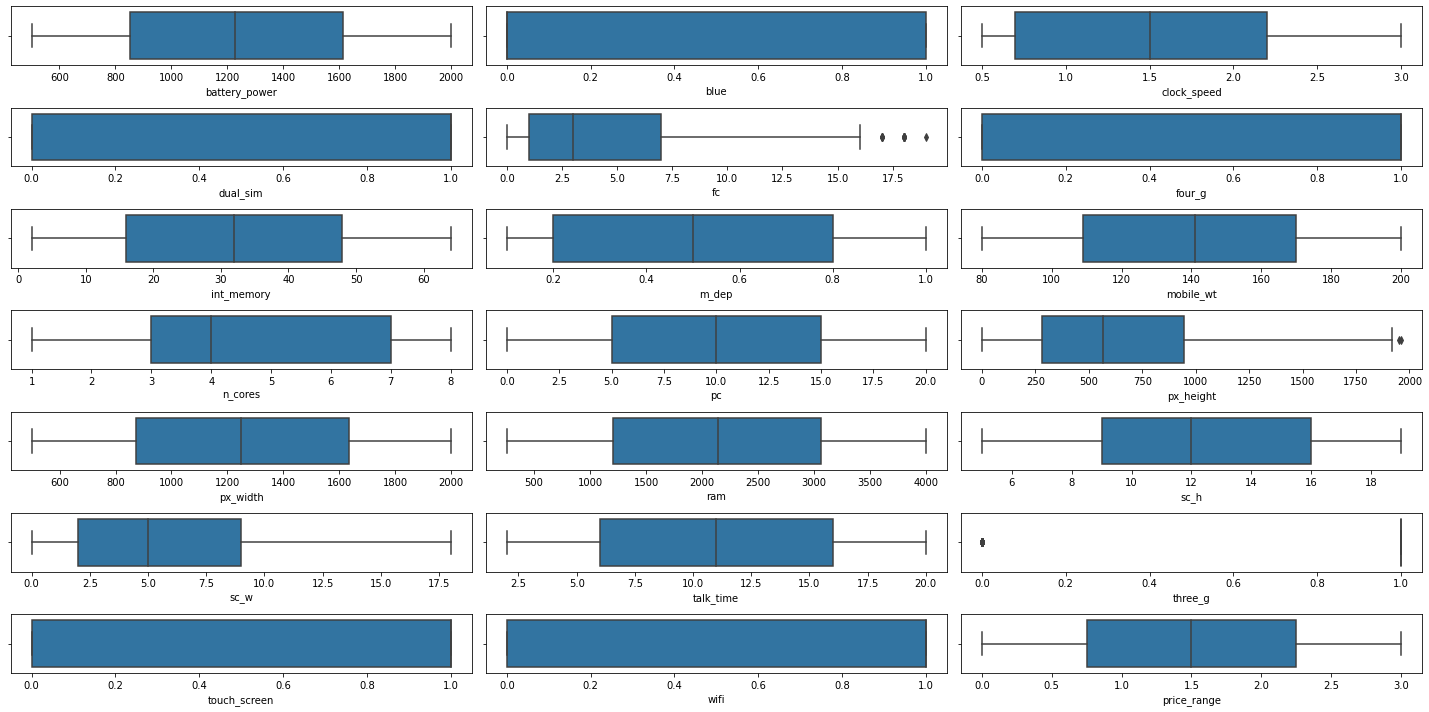

In [ ]:
plt.figure(figsize = (20, 10))
x = 1 

for column in train.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(train[column])
    x+= 1
plt.tight_layout()

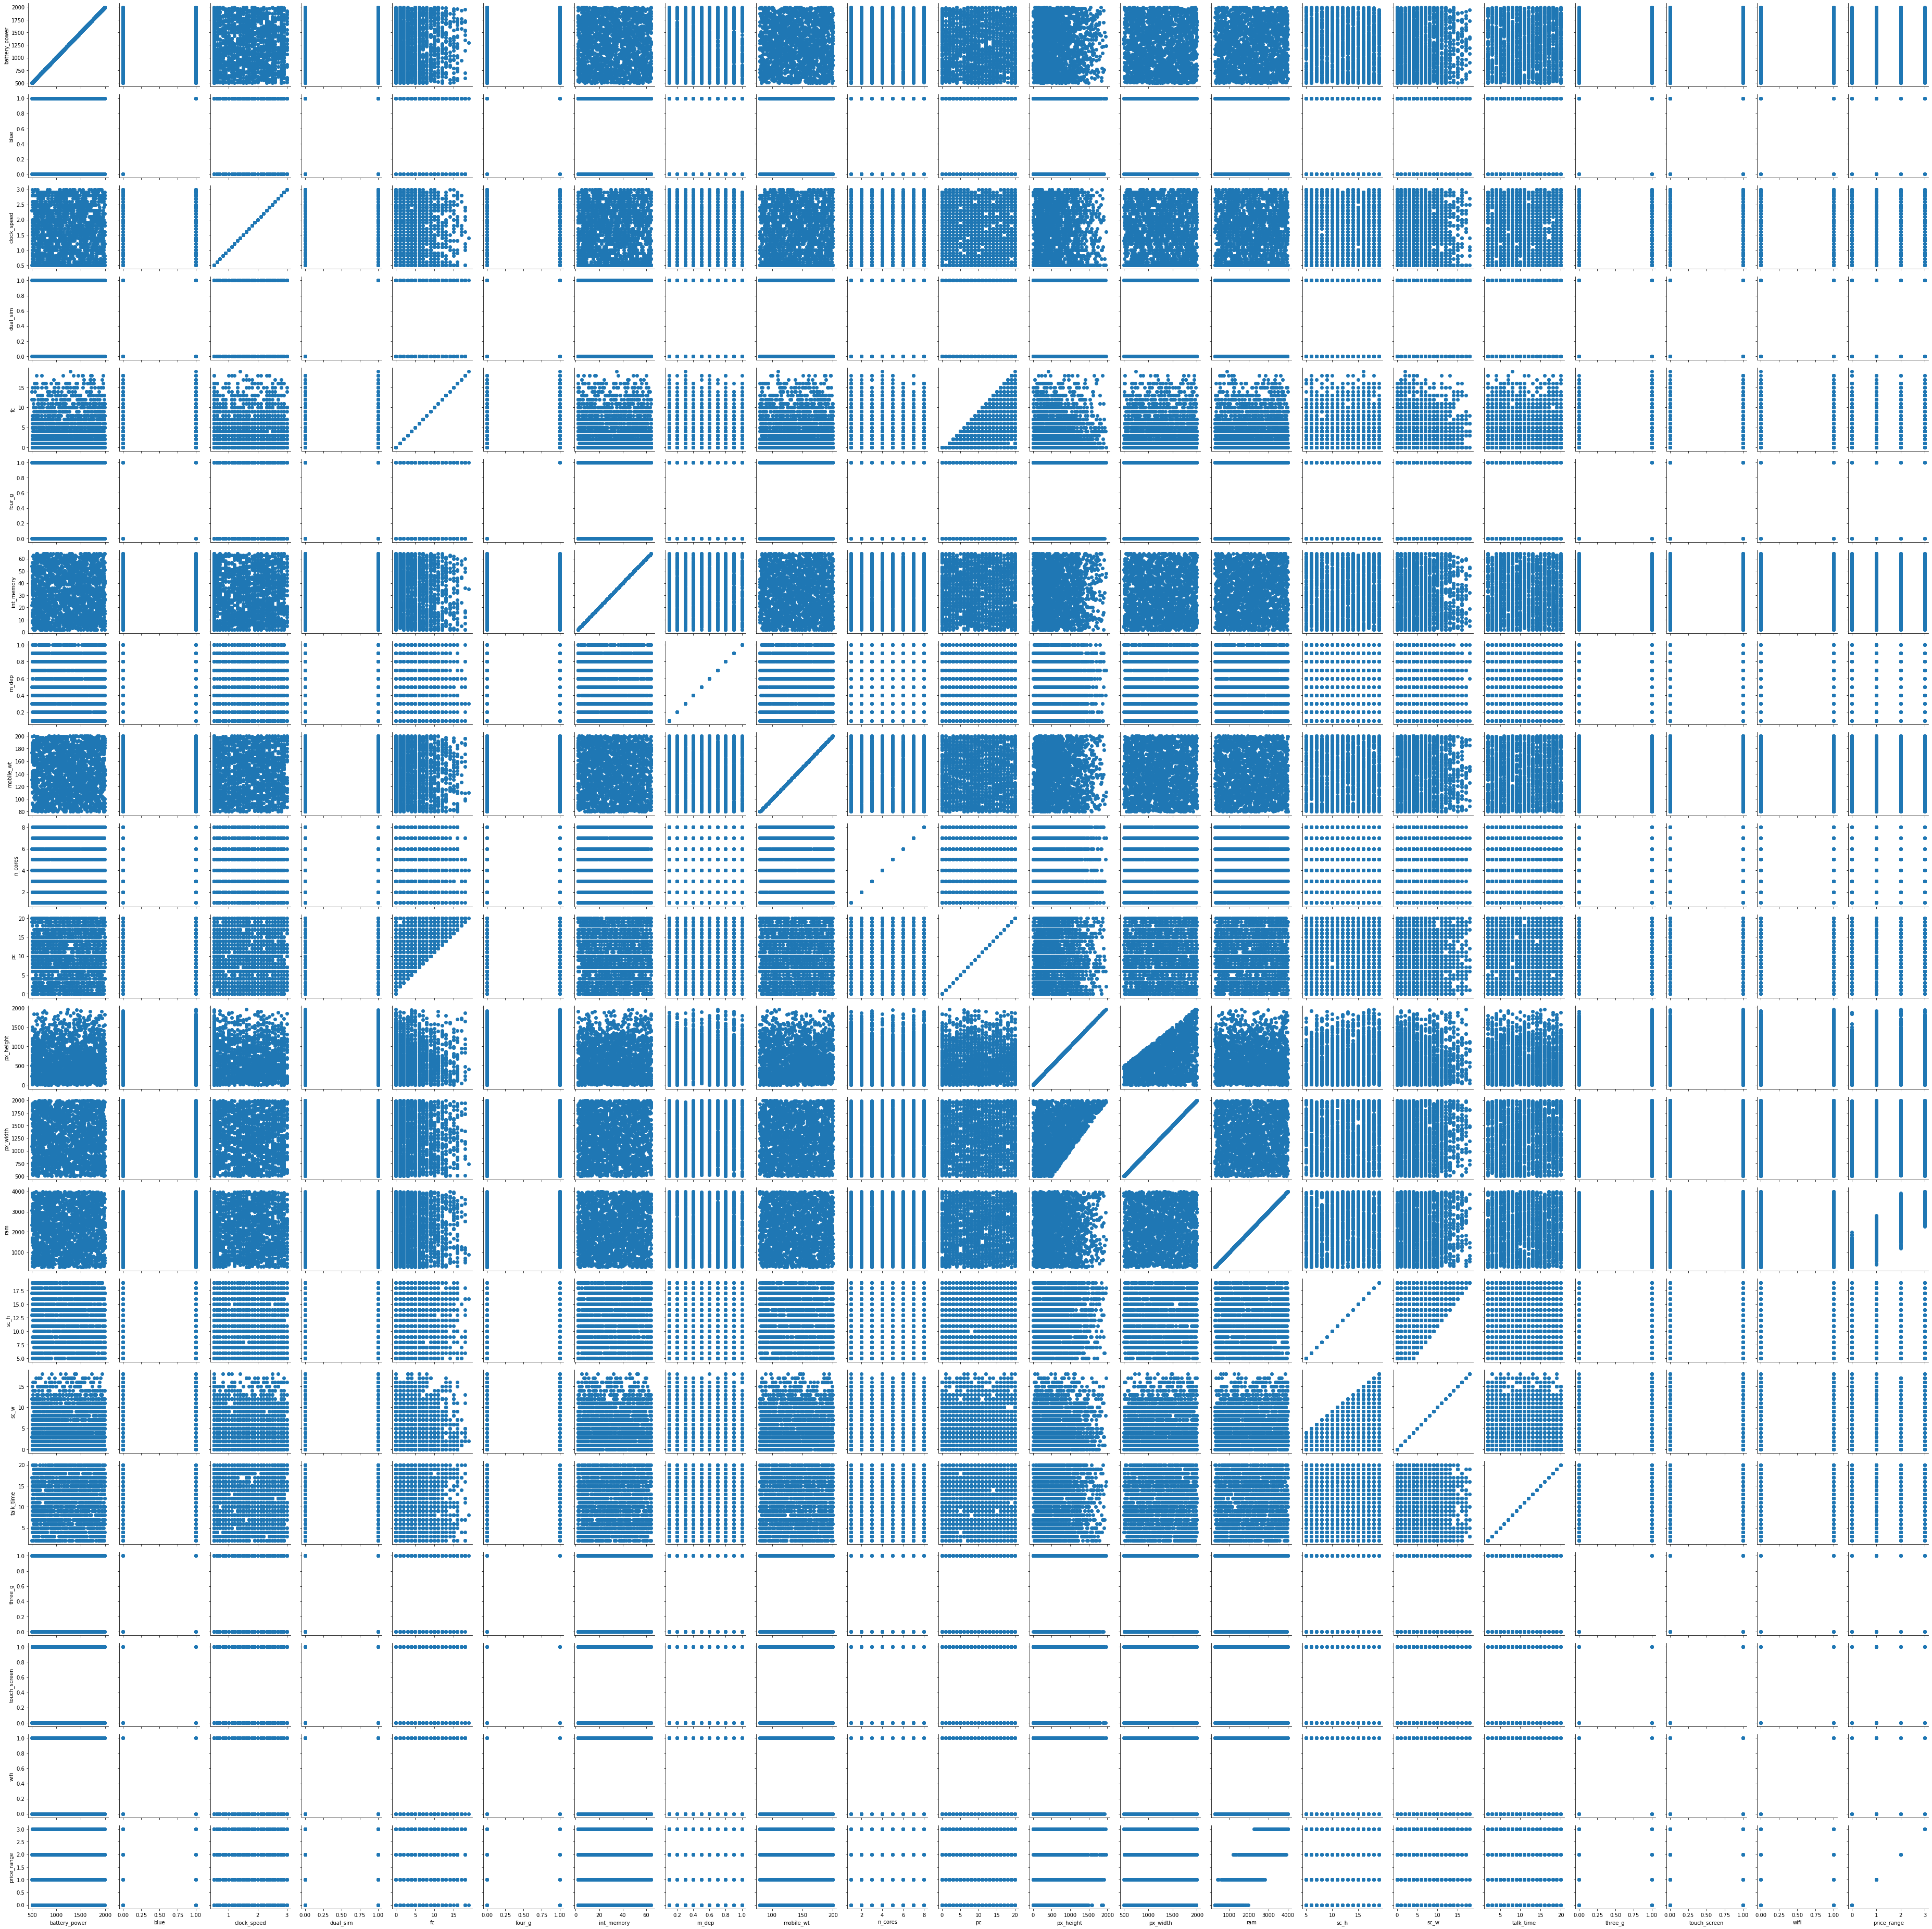

In [ ]:
g=sns.PairGrid(data=train)
g.map(plt.scatter)

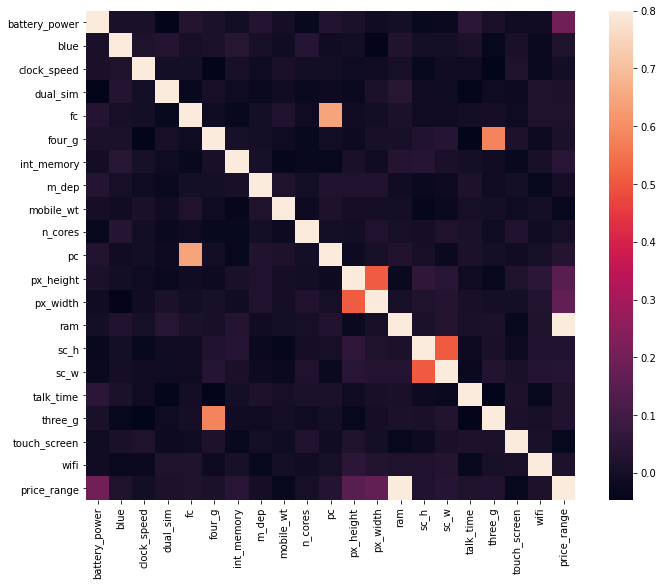

In [ ]:
corrmat=train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [ ]:
corrmat.style.background_gradient(cmap="viridis").set_precision(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,0.03,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01,0.20
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,-0.01,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02,0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02,-0.01
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,0.64,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,0.02,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,-0.01,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02,0.01
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,-0.03,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01,0.04
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,0.03,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03,0.00
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,0.02,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00,-0.03
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,-0.00,-0.01,0.02,0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01,0.00


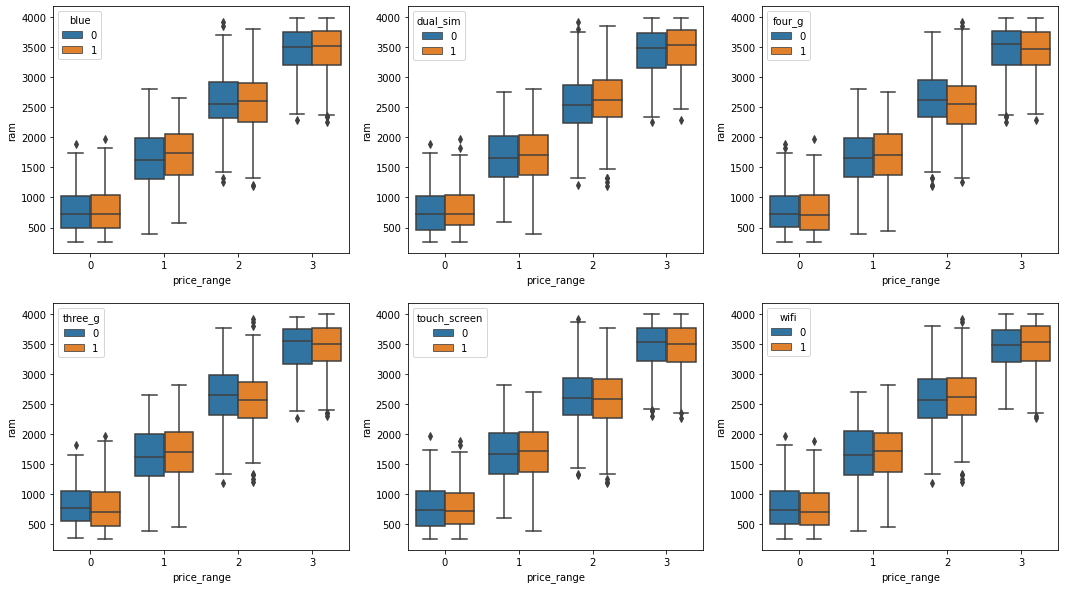

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(18,10))
cat=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
k=0
for i in range(2):
    for j in range(3):
        sns.boxplot(ax=axes[i,j],x="price_range",y="ram",data=train,hue=cat[k])
        k+=1

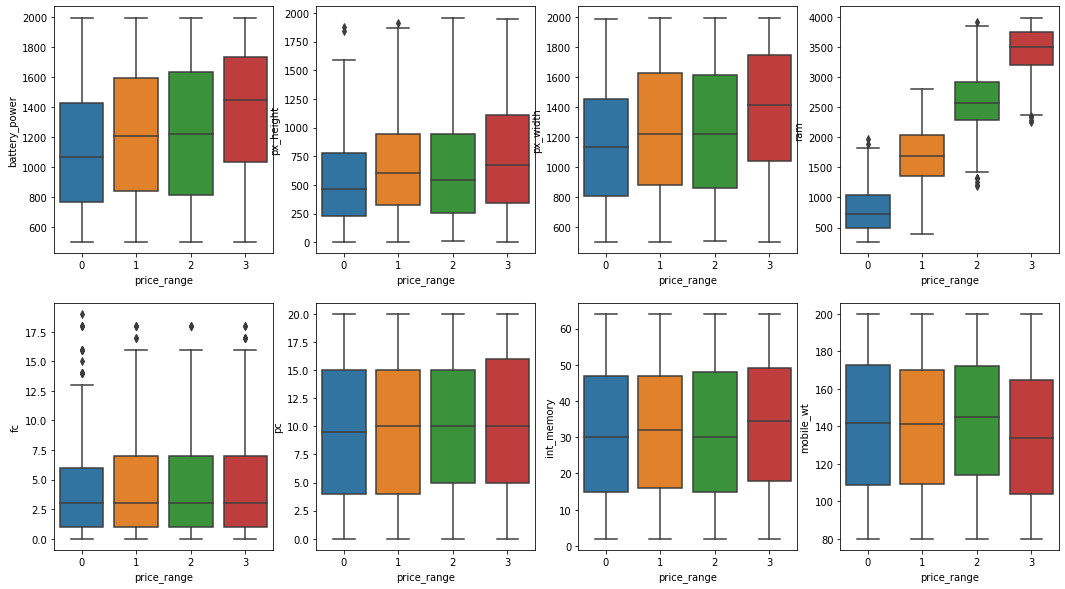

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(18,10))
imp=['battery_power','px_height','px_width','ram','fc','pc','int_memory','mobile_wt']
k=0
for i in range(2):
    for j in range(4):
        sns.boxplot(ax=axes[i][j],x="price_range",y=imp[k],data=train)
        k+=1

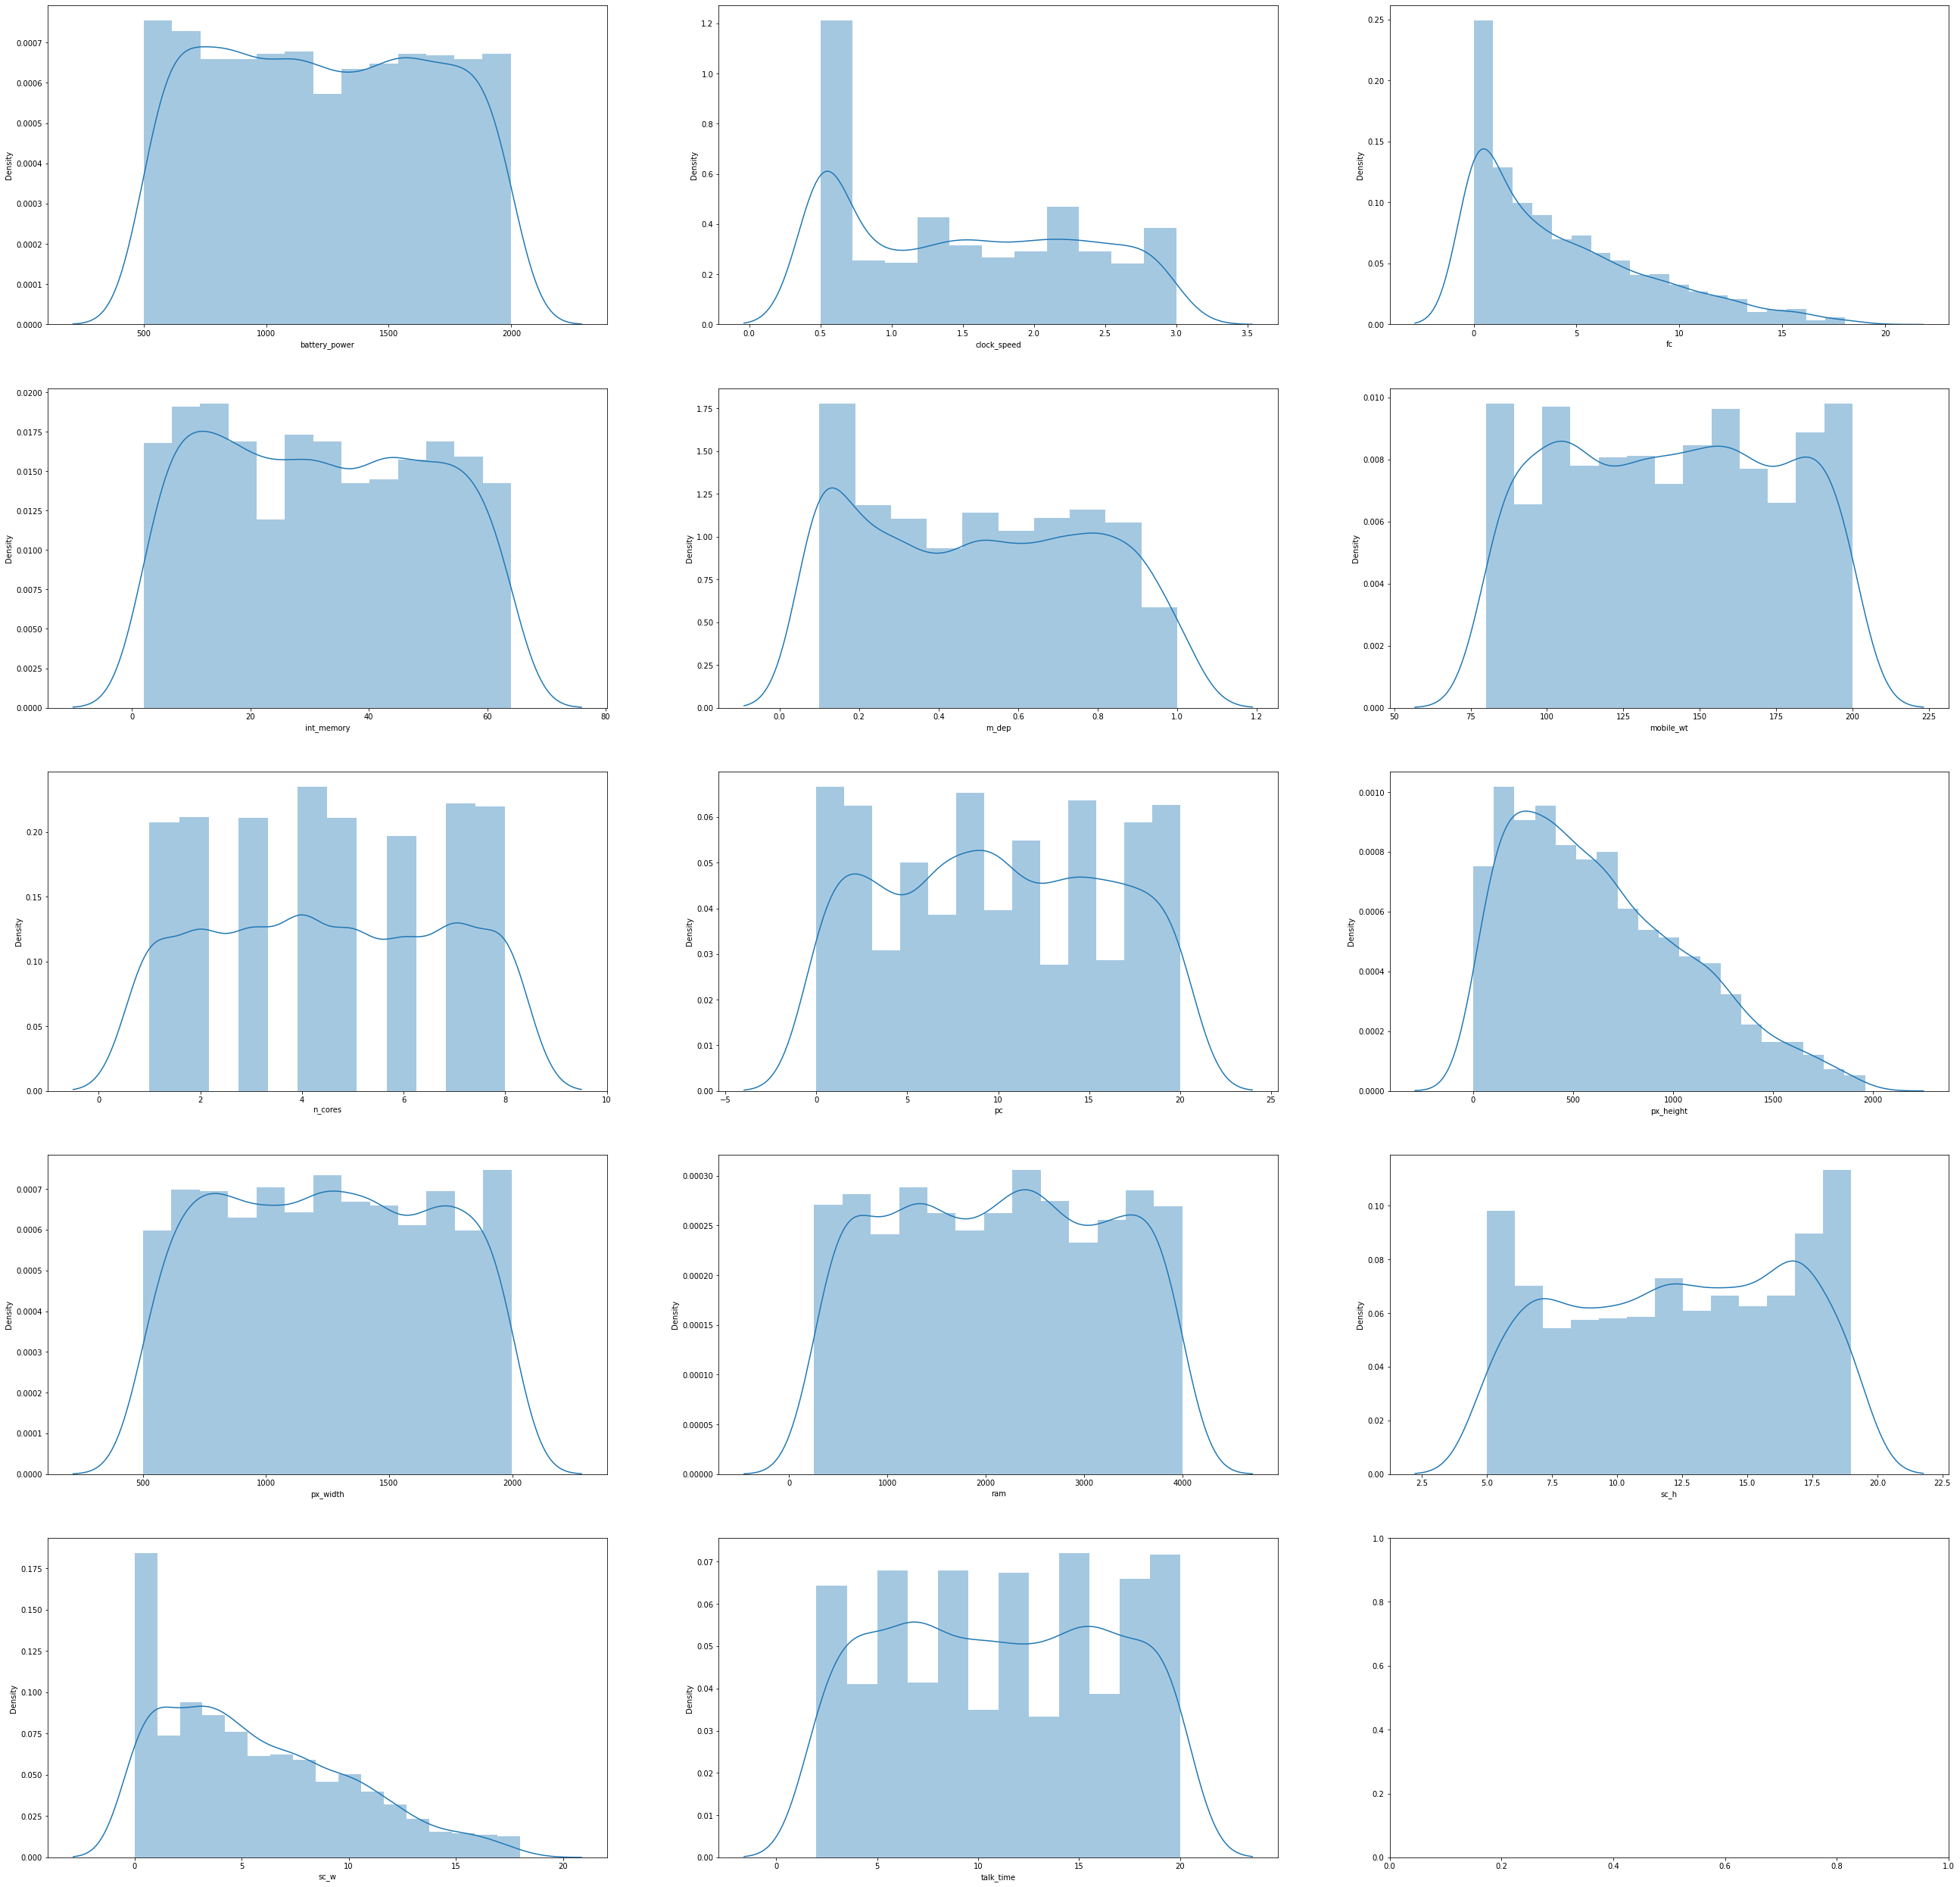

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(45,45))
for i, j in zip(num_data,ax.flatten()):
    sns.distplot(train[i],ax=j)
plt.show()

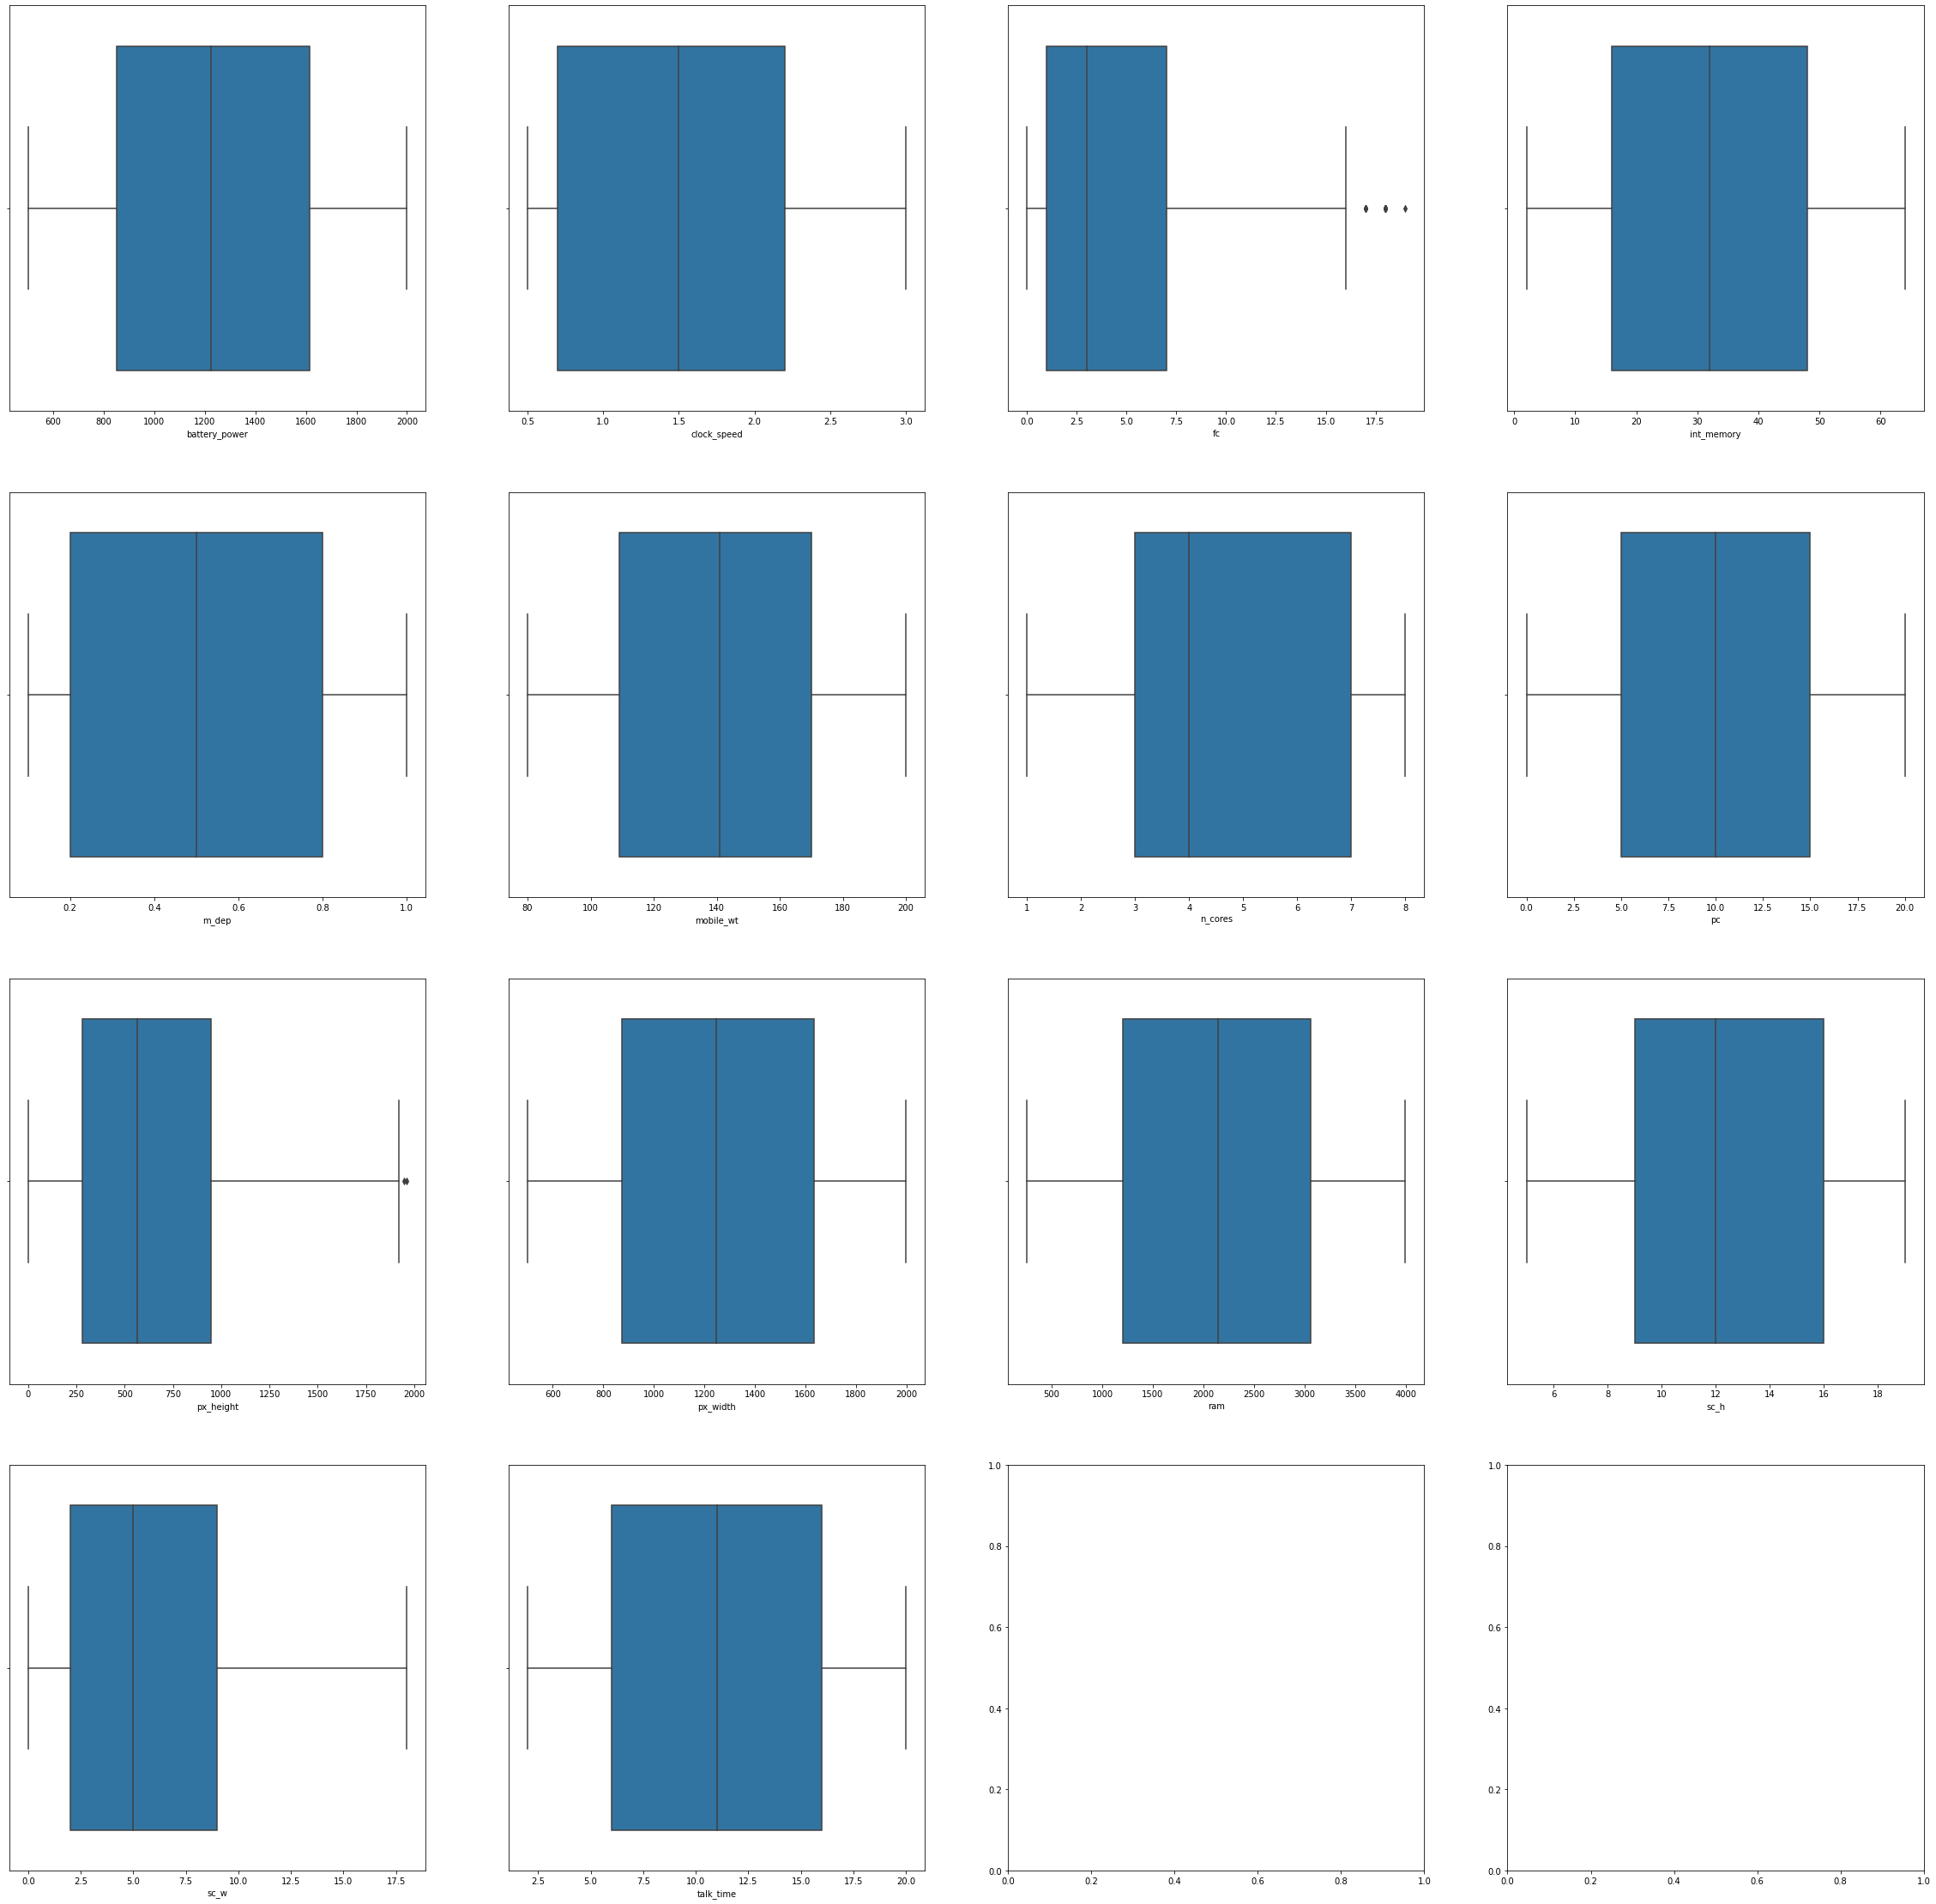

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(40,40))
for i, j in zip(num_data,ax.flatten()):
    sns.boxplot(train[i],ax=j)
plt.show()


From the above data we con understand that {'ram','battery_power','px_height','px_width','pc','fc','int_memory','mobile_wt'}are the important factors for the changes in the price_range 


So let us do some EDA on these specified columns

---



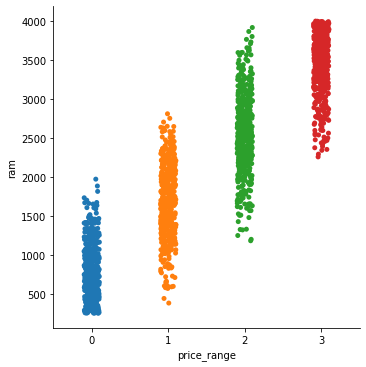

In [ ]:
sns.catplot(x="price_range",y="ram",data=train)


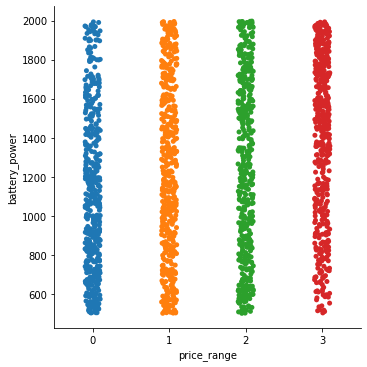

In [ ]:
sns.catplot(x="price_range",y="battery_power",data=train)



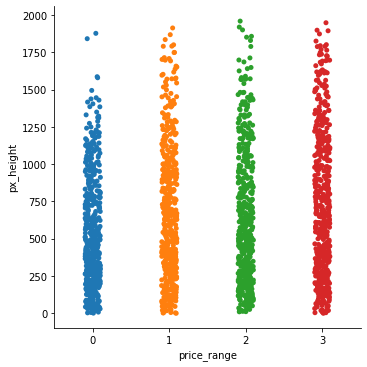

In [ ]:
sns.catplot(x="price_range",y="px_height",data=train)


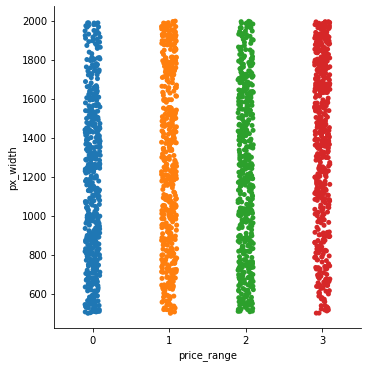

In [ ]:
sns.catplot(x="price_range",y="px_width",data=train)


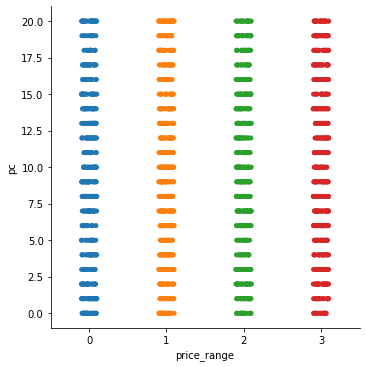

In [ ]:
sns.catplot(x="price_range",y="pc",data=train)


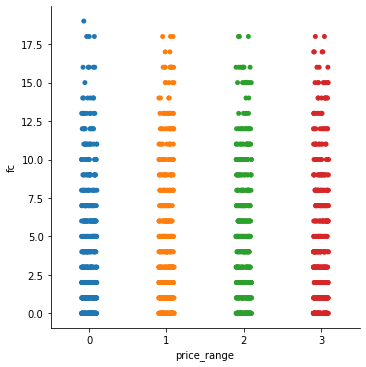

In [ ]:
sns.catplot(x="price_range",y="fc",data=train)


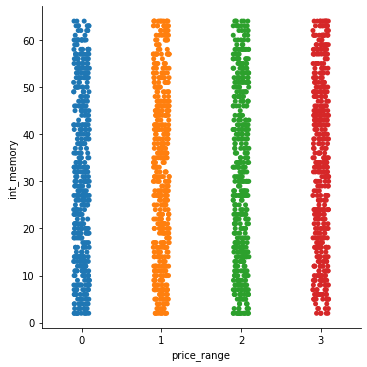

In [ ]:
sns.catplot(x="price_range",y="int_memory",data=train)


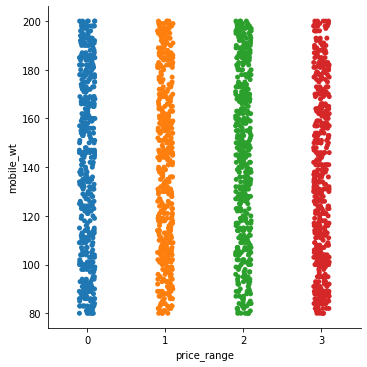

In [ ]:
sns.catplot(x="price_range",y="mobile_wt",data=train)


In [ ]:
g=sns.pairplot(data=train[['ram','battery_power','px_height','px_width','pc','fc','int_memory','mobile_wt','price_range']],hue='price_range',palette='gist_earth_r')

Output hidden; open in https://colab.research.google.com to view.

**Lets Do point plots to specify the relation between Important data and price range**

<AxesSubplot:xlabel='price_range', ylabel='ram'>

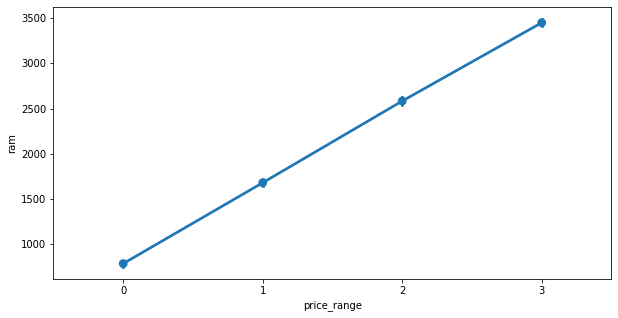

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="ram", x="price_range", data=train)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

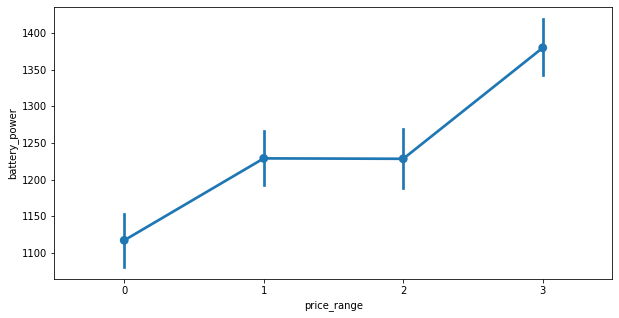

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="battery_power", x="price_range", data=train)

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

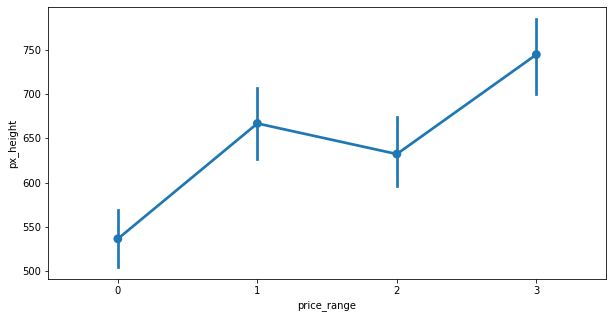

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="px_height", x="price_range", data=train)

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

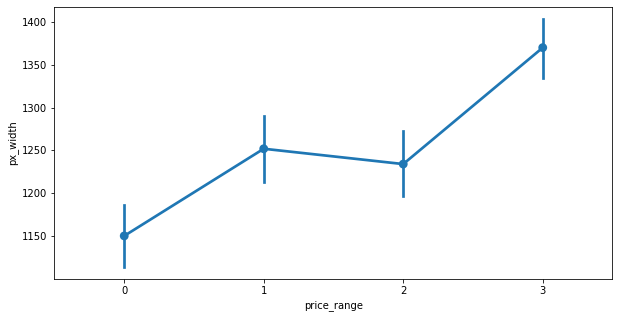

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="px_width", x="price_range", data=train)

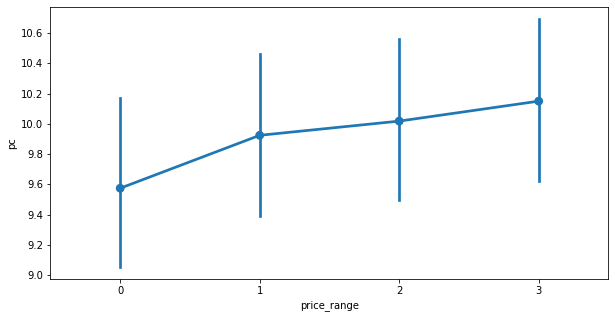

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="pc", x="price_range", data=train)

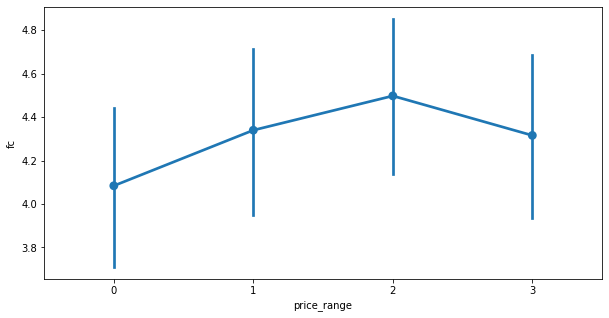

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="fc", x="price_range", data=train)

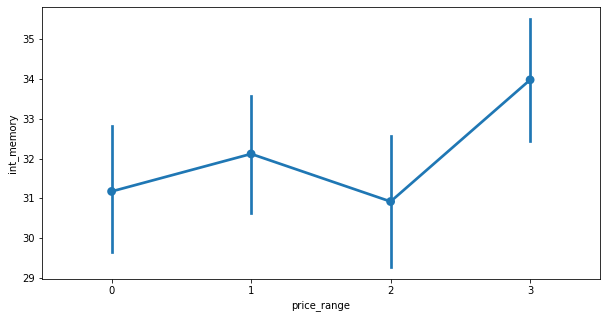

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="int_memory", x="price_range", data=train)

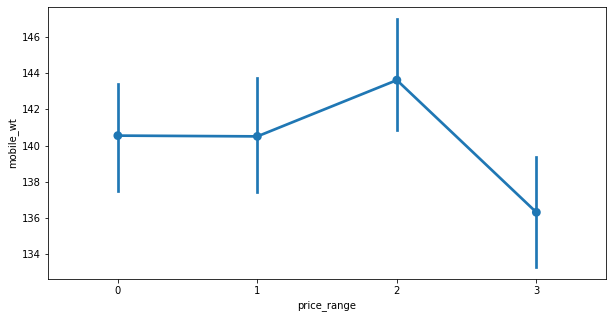

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(y="mobile_wt", x="price_range", data=train)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

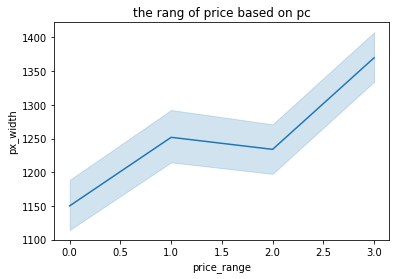

In [ ]:
sns.lineplot(x='price_range', y='px_width', data=train).set_title('the rang of price based on pc',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

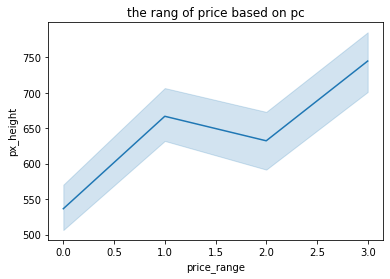

In [ ]:
sns.lineplot(x='price_range', y='px_height', data=train).set_title('the rang of price based on pc',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

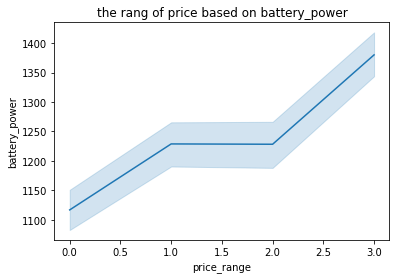

In [ ]:
sns.lineplot(x='price_range', y='battery_power', data=train).set_title('the rang of price based on battery_power',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

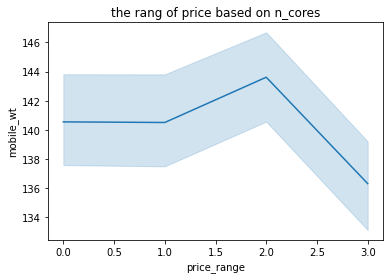

In [ ]:
sns.lineplot(x='price_range', y='mobile_wt', data=train).set_title('the rang of price based on n_cores',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

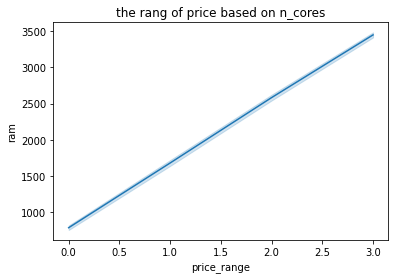

In [ ]:
sns.lineplot(x='price_range', y='ram', data=train).set_title('the rang of price based on n_cores',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

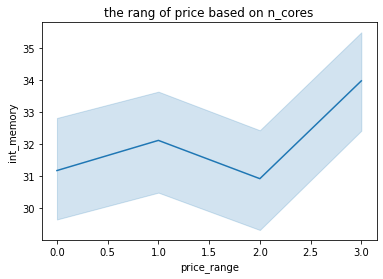

In [ ]:
sns.lineplot(x='price_range', y='int_memory', data=train).set_title('the rang of price based on n_cores',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

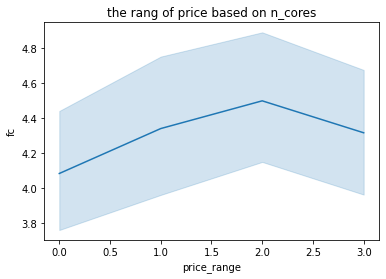

In [ ]:
sns.lineplot(x='price_range', y='fc', data=train).set_title('the rang of price based on n_cores',fontsize=12);
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

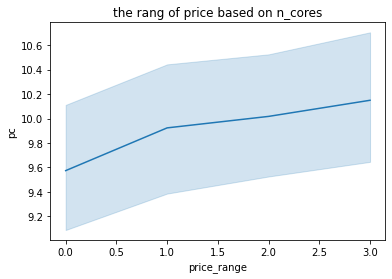

In [ ]:
sns.lineplot(x='price_range', y='pc', data=train).set_title('the rang of price based on n_cores',fontsize=12);
plt.figure

**Comparing old trend vs new trend**

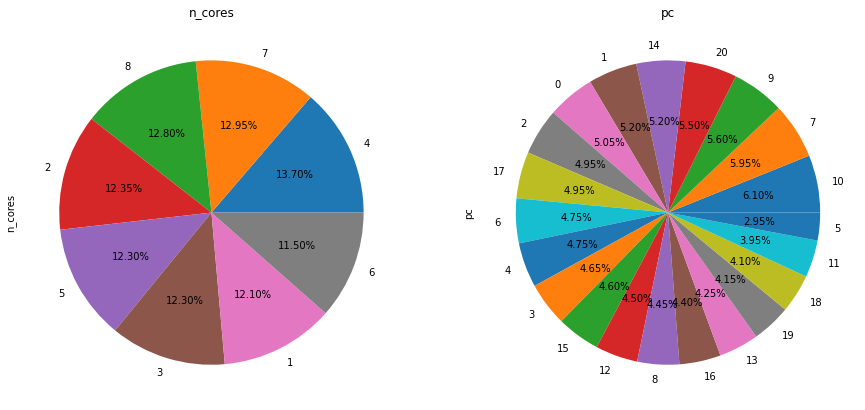

In [ ]:
pie,ax=plt.subplots(1,2,figsize=(15,15))
train['n_cores'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
train['pc'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1])
ax[0].set_title('n_cores')
ax[1].set_title('pc')

plt.show()


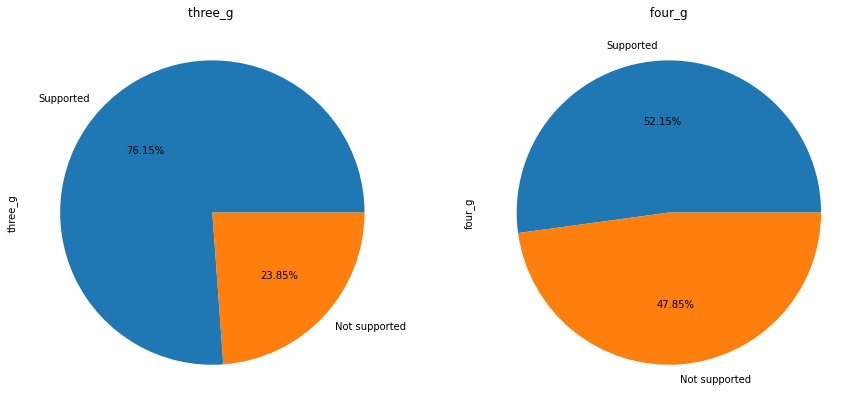

In [ ]:
labels = ["Supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(15,15))
train['three_g'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0], labels=labels)
train['four_g'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1], labels=labels)
ax[0].set_title('three_g ')
ax[1].set_title(' four_g ')
plt.show()

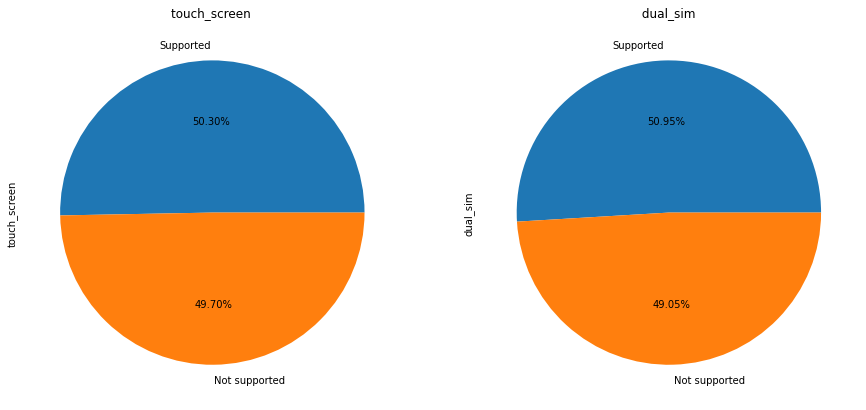

In [ ]:
labels = ["Supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(15,15))
train['touch_screen'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0], labels=labels)
train['dual_sim'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1], labels=labels)
ax[0].set_title('touch_screen ')
ax[1].set_title(' dual_sim ')
plt.show()

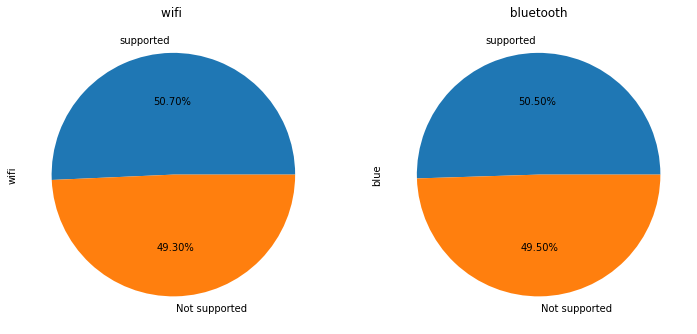

In [ ]:
labels = ["supported",'Not supported']
f,ax=plt.subplots(1,2,figsize=(12,12))
train['wifi'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0], labels=labels)
train['blue'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1], labels=labels)
ax[0].set_title('wifi ')
ax[1].set_title(' bluetooth ')
plt.show()

In [ ]:
X = train.drop(['price_range'], axis=1)
Y = train['price_range']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y,test_size=0.25,random_state=52)

**PART** 2-Evaluation


Model1-ANN(metric-accuracy)

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation='relu', input_shape=(20,)))

model.add(Dense(units = 16, activation='relu'))

model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 4, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, epochs=300, verbose=1, validation_data=(X_test, Y_test))

y_pred_seq =model.predict(X_test)

Epoch 1/300
47/47 [==============================] - 1s 15ms/step - loss: 159.5564 - accuracy: 0.3031 - val_loss: 34.6195 - val_accuracy: 0.3540
Epoch 2/300
47/47 [==============================] - 0s 3ms/step - loss: 26.3245 - accuracy: 0.3753 - val_loss: 15.1378 - val_accuracy: 0.4520
Epoch 3/300
47/47 [==============================] - 0s 3ms/step - loss: 11.9024 - accuracy: 0.4708 - val_loss: 10.2656 - val_accuracy: 0.4980
Epoch 4/300
47/47 [==============================] - 0s 3ms/step - loss: 9.4080 - accuracy: 0.4744 - val_loss: 8.1830 - val_accuracy: 0.4920
Epoch 5/300
47/47 [==============================] - 0s 3ms/step - loss: 7.5798 - accuracy: 0.4817 - val_loss: 7.0904 - val_accuracy: 0.5020
Epoch 6/300
47/47 [==============================] - 0s 3ms/step - loss: 6.5686 - accuracy: 0.4985 - val_loss: 6.8138 - val_accuracy: 0.4960
Epoch 7/300
47/47 [==============================] - 0s 3ms/step - loss: 5.9226 - accuracy: 0.5042 - val_loss: 5.1031 - val_accuracy: 0.5460
Epoch

In [ ]:
test = []
for i in range(len(y_pred_seq)):
    test.append(np.argmax(y_pred_seq[i]))
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,test)
print("Accuracy of ANN  = " + str(acc*100))

Accuracy of ANN  = 74.8


Model2-MLPClassifier(metric-accuracy)


In [ ]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(70,70,70), random_state=1)
pipe = Pipeline([('scaler', StandardScaler()), ('mlp', mlp)])
pipe.fit(X_train,Y_train)
y_pred_MLP =pipe.predict(X_test)
print("Accuracy for MLPClassifier:",metrics.accuracy_score(Y_test, y_pred_MLP)*100)

Accuracy for MLPClassifier: 90.0


Model3-RNN(LSTM)-metric-accuracy


In [ ]:
import tensorflow
from tensorflow.keras.layers import LSTM
from keras.layers import Dense, Activation, Flatten
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(10000000, 16, input_length=20),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(32,input_shape=(1500,20),recurrent_dropout=0.2,return_sequences=True)),
    tensorflow.keras.layers.Flatten() ,
    tensorflow.keras.layers.Dense(24, activation='relu'),
    tensorflow.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


history_2 = model.fit(X_train, Y_train, epochs=5, batch_size=32,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
47/47 [==============================] - 166s 3s/step - loss: 1.3876 - accuracy: 0.2621 - val_loss: 1.3863 - val_accuracy: 0.2620
Epoch 2/5
47/47 [==============================] - 140s 3s/step - loss: 1.3803 - accuracy: 0.3141 - val_loss: 1.3835 - val_accuracy: 0.2880
Epoch 3/5
47/47 [==============================] - 140s 3s/step - loss: 1.2557 - accuracy: 0.4584 - val_loss: 1.5280 - val_accuracy: 0.2620
Epoch 4/5
47/47 [==============================] - 142s 3s/step - loss: 0.8385 - accuracy: 0.6508 - val_loss: 1.8403 - val_accuracy: 0.2860
Epoch 5/5
47/47 [==============================] - 158s 3s/step - loss: 0.5128 - accuracy: 0.8427 - val_loss: 2.7594 - val_accuracy: 0.2980


In [ ]:
y_pred_LSTM=model.predict(X_test)
test = []
for i in range(len(y_pred_seq)):
    test.append(np.argmax(y_pred_seq[i]))
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,test)
print("Accuracy of LSTM model is = " + str(acc*100))

Accuracy of LSTM model is = 74.8


Model4-RandomForestClassifier
Model5-LightGBM Classifier
Model6-XGBClassifier
Model7-Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


from xgboost import XGBClassifier

In [ ]:
X_train.shape

(1500, 20)

In [ ]:
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, Y_train)


y_pred_lgb = lgb_clf.predict(X_test)


RFG_model=RandomForestClassifier()
RFG_model.fit(X_train,Y_train)
y_pred_RFG = RFG_model.predict(X_test)
XGB_model=XGBClassifier(colsample_bylevel=0.9,colsample_bytree=0.8,gamma=0.99,max_depth=5,min_child_weight=1,n_estimators=10,nthread=4,random_state=2,silent=True)
XGB_model.fit(X_train,Y_train)
y_pred_XGB = XGB_model.predict(X_test)

[16:29:45] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:29:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
from sklearn import svm


svm_clf = svm.SVC(kernel='linear') 

svm_clf.fit(X_train, Y_train)

y_predsvm = svm_clf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy for support-vector machines:",metrics.accuracy_score(Y_test, y_predsvm))

print("Precesion for support-vector machines:",metrics.precision_score(Y_test, y_predsvm,pos_label='positive',average='micro'))

print("Recall for support-vector machines:",metrics.recall_score(Y_test, y_predsvm,pos_label='positive'
                                           ,average='micro'))
print("Accuracy for LightGBM Classifier:",metrics.accuracy_score(Y_test, y_pred_lgb))

print("Precesion for LightGBM Classifier:",metrics.precision_score(Y_test, y_pred_lgb,pos_label='positive'
                                           ,average='micro'))

print("Recall for LightGBM Classifier:",metrics.recall_score(Y_test, y_pred_lgb,pos_label='positive'
                                          , average='micro'))
print("Accuracy for Random Forest Classifier:",metrics.accuracy_score(Y_test, y_pred_RFG))

print("Precesion for Random Forest Classifier:",metrics.precision_score(Y_test, y_pred_RFG,pos_label='positive'
                                           ,average='micro'))

print("Recall for Random Forest Classifier:",metrics.recall_score(Y_test, y_pred_RFG,pos_label='positive'
                                           ,average='micro'))
print("Accuracy for XGBClassifier :",metrics.accuracy_score(Y_test, y_pred_XGB))

print("Precesion for XGBClassifier:",metrics.precision_score(Y_test, y_pred_XGB,pos_label='positive'
                                           ,average='micro'))

print("Recall for XGBClassifier:",metrics.recall_score(Y_test, y_pred_XGB,pos_label='positive'
                                           ,average='micro'))

Accuracy for support-vector machines: 0.974
Precesion for support-vector machines: 0.974
Recall for support-vector machines: 0.974
Accuracy for LightGBM Classifier: 0.914
Precesion for LightGBM Classifier: 0.914
Recall for LightGBM Classifier: 0.914
Accuracy for Random Forest Classifier: 0.902
Precesion for Random Forest Classifier: 0.902
Recall for Random Forest Classifier: 0.902
Accuracy for XGBClassifier : 0.898
Precesion for XGBClassifier: 0.898
Recall for XGBClassifier: 0.898
